In [31]:
import pandas as pd
import matplotlib.pyplot as plt

The purpose of this EDA is to explore the types of jobs and salaries of data professionals from the countries available. Of particular interest are people who work in the United States, but they will be compared with others from the next top 5 responding countries.

To start, I load the csv into a dataframe and start looking for any glaring issues and relevant columns to the analysis.

In [2]:
rawData = pd.read_csv('C:\salary_survey.csv')

rawData.head()

,survey_year,timestamp,salaryusd,country,postalcode,primarydatabase,yearswiththisdatabase,otherdatabases,employmentstatus,jobtitle,...,hoursworkedperweek,telecommutedaysperweek,populationoflargestcitywithin20miles,employmentsector,lookingforanotherjob,careerplansthisyear,gender,otherjobduties,kindsoftasksperformed,counter
0,2017,2017-01-05T05:10:20.451,200000,United States,Not Asked,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,...,45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
1,2017,2017-01-05T05:26:23.388,61515,United Kingdom,Not Asked,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,...,35,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,Not Asked,1
2,2017,2017-01-05T05:32:57.367,95000,Germany,Not Asked,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,...,45,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
3,2017,2017-01-05T05:33:03.316,56000,United Kingdom,Not Asked,Microsoft SQL Server,6,NaN,Full time employee,DBA,...,40,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
4,2017,2017-01-05T05:34:33.866,35000,France,Not Asked,Microsoft SQL Server,10,Oracle,Full time employee of a consulting/contracting...,DBA,...,40,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   survey_year                           6893 non-null   int64 
 1   timestamp                             6893 non-null   object
 2   salaryusd                             6893 non-null   object
 3   country                               6893 non-null   object
 4   postalcode                            5934 non-null   object
 5   primarydatabase                       6893 non-null   object
 6   yearswiththisdatabase                 6893 non-null   int64 
 7   otherdatabases                        5520 non-null   object
 8   employmentstatus                      6893 non-null   object
 9   jobtitle                              6893 non-null   object
 10  managestaff                           6893 non-null   object
 11  yearswiththistypeofjob        

In [4]:
rawData[rawData.duplicated()].size

0

In [5]:
rawData.nunique()

survey_year                                3
timestamp                               6891
salaryusd                               1242
country                                   85
postalcode                              2304
primarydatabase                           15
yearswiththisdatabase                     42
otherdatabases                          1339
employmentstatus                           5
jobtitle                                  23
managestaff                                2
yearswiththistypeofjob                    41
howmanycompanies                           7
otherpeopleonyourteam                      7
companyemployeesoverall                    7
databaseservers                          250
education                                  5
educationiscomputerrelated                 2
certifications                             3
hoursworkedperweek                        57
telecommutedaysperweek                     6
populationoflargestcitywithin20miles       6
employment

Since there are no apparent duplicates, it's time to cut down the size of the data and select the relevant features. Special attention needs to be payed to the timestamps because it's possible that the same person was record twice in a different year, potentially with a new position, salary, and education completed. Other things of interest are obviously salary,job titles and years of experience, but education and the country where this person works could influence the data significantly, so let's explore those as well.

In [6]:
featCols = rawData[['timestamp', 'salaryusd', 'country', 'jobtitle', 'yearswiththistypeofjob', 'education']].copy()

In [7]:
featCols.loc[featCols['country'] == 'United States'].loc[featCols['education'] == 'Bachelors (4 years)']

,timestamp,salaryusd,country,jobtitle,yearswiththistypeofjob,education
14,2017-01-05T07:35:03.887,85000,United States,DBA,2,Bachelors (4 years)
22,2017-01-05T07:42:05.999,123000,United States,DBA,7,Bachelors (4 years)
23,2017-01-05T07:42:36.502,100800,United States,Architect,6,Bachelors (4 years)
27,2017-01-05T07:44:09.575,80000,United States,DBA,3,Bachelors (4 years)
29,2017-01-05T07:45:35.063,102000,United States,DBA,4,Bachelors (4 years)
...,...,...,...,...,...,...
6882,2019-01-03T05:38:49.032,123000,United States,DBA (General - splits time evenly between writ...,6,Bachelors (4 years)
6883,2019-01-03T08:03:37.416,101500,United States,DBA (Production Focus - build & troubleshoot s...,9,Bachelors (4 years)
6884,2019-01-03T09:53:49.374,107000,United States,DBA (Production Focus - build & troubleshoot s...,8,Bachelors (4 years)
6886,2019-01-03T11:32:51.601,132000,United States,"DBA (Development Focus - tunes queries, indexe...",20,Bachelors (4 years)


In [8]:
print(featCols['education'].unique())

['Masters' 'None (no degree completed)' 'Associates (2 years)'
 'Bachelors (4 years)' 'Doctorate/PhD']


In [9]:
print(featCols['jobtitle'].unique())

['DBA' 'Other' 'Developer: App code (C#, JS, etc)' 'Engineer'
 'Developer: T-SQL'
 'Developer: Business Intelligence (SSRS, PowerBI, etc)' 'Architect'
 'Analyst' 'Manager' 'Data Scientist' 'Principal database engineer'
 'DevOps, Sr Software Engineer DBA' 'Technician ' 'Database Specialist'
 'Consultant' 'Systems Administrator' 'Sales' 'DBA / BI Developer'
 'Sr Consultant ' 'Analytics consultant'
 'DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)'
 'DBA (Development Focus - tunes queries, indexes, does deployments)'
 'DBA (Production Focus - build & troubleshoot servers, HA/DR)']


The standard levels of education each appear as expected without oddly worded duplicates and there appear to be quite a few special varieties of data base analysts among the data professionals here. Since we're primarily interested in data scientists, analysts, and DBA's the generic 'DBA' is chosen as a representative there and now it's time to check and clean the numerical data in the salary column since it was listed early as an object column instead of int or float.

In [10]:
featCols[pd.to_numeric(featCols.salaryusd, errors = 'coerce').isnull()]

,timestamp,salaryusd,country,jobtitle,yearswiththistypeofjob,education
5968,2018-01-04T06:37:34.259,50 621,Germany,DBA (General - splits time evenly between writ...,2,Associates (2 years)
6123,2018-12-11T09:36:42.769,"110, 000",United States,DBA (Production Focus - build & troubleshoot s...,1,Bachelors (4 years)
6419,2018-12-14T04:22:37.449,66 000,Sweden,DBA (Production Focus - build & troubleshoot s...,2,Associates (2 years)


In [11]:
featCols.at[5968,'salaryusd'] = 50621
featCols.at[6123,'salaryusd'] = 110000
featCols.at[6419,'salaryusd'] = 66000

That takes care of the formatting issues for the most part, but it's possible that someone entered a decimal point instead of a comma when marking the thousands place in their salary. This will generate some unrealistically low salaries in the data, for example "100.000" instead of "100,000.00". These anomalies need to be isolated and possibly discarded if corrections seem dubious after the final conversion for the salary column.

In [12]:
featCols['salaryusd'] = pd.to_numeric(featCols.salaryusd)
lowFloats = [x for x in featCols['salaryusd'] if x < 30000]

In [13]:
len(lowFloats)

333

In [14]:
print(lowFloats)

[29511.0, 23000.0, 17621.0, 26500.0, 23000.0, 10000.0, 15000.0, 12000.0, 16666.0, 27000.0, 21000.0, 7968.0, 15000.0, 17647.0, 26000.0, 25500.0, 14000.0, 12000.0, 12300.0, 12900.0, 10000.0, 8300.0, 29000.0, 20000.0, 20000.0, 12000.0, 16000.0, 20000.0, 25000.0, 3900.0, 6700.0, 23500.0, 8400.0, 29148.0, 27000.0, 17500.0, 26300.0, 23000.0, 13500.0, 13000.0, 20000.0, 25000.0, 12000.0, 22000.0, 4423.0, 11300.0, 4420.0, 5500.0, 14000.0, 11000.0, 29200.0, 18000.0, 1600.0, 1250.0, 29000.0, 7515.0, 6200.0, 25500.0, 11119.0, 22941.0, 25000.0, 12600.0, 11000.0, 28739.0, 24000.0, 22000.0, 19000.0, 27000.0, 7650.0, 20484.0, 21350.0, 10000.0, 12000.0, 20000.0, 27280.0, 27000.0, 4118.0, 545.0, 14000.0, 15500.0, 8200.0, 27000.0, 8000.0, 20000.0, 27260.0, 17647.0, 21600.0, 20000.0, 24000.0, 15000.0, 28500.0, 24000.0, 18000.0, 29000.0, 25000.0, 11000.0, 25000.0, 13455.0, 18200.0, 20000.0, 13000.0, 24000.0, 26000.0, 27049.0, 8500.0, 11500.0, 5000.0, 20000.0, 7473.0, 430.0, 15500.0, 24000.0, 25000.0, 28000

As expected, there are some pretty strange numbers here. If/why someone accurately calculated their salary to $44.806000000000004, we will never know. Additionally, there appear to be quite a few 0s in the data. These are possibly volunteers or unpaid interns of some kind, or possibly those who declined to give their salary information, all of which are not useful for our purpose and can be safely discarded.

In [15]:
featCols.drop(featCols[featCols.salaryusd < 30000].index, inplace = True)

In [16]:
pd.options.display.float_format = '{:20,.2f}'.format
featCols.salaryusd.describe()

count               6,560.00
mean               96,687.68
std                56,492.07
min                30,000.00
25%                68,000.00
50%                92,000.00
75%               115,000.00
max             1,450,000.00
Name: salaryusd, dtype: float64

In [17]:
featCols.drop(featCols[featCols.salaryusd > 210000].index, inplace = True)

Since two standard deviations above the mean is pretty unlikely and unhelpful for analyzing the average data scientist. Those above $210,000 are dropped as outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x175dea53ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x175dea691c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x175dea53760>],
 'medians': [<matplotlib.lines.Line2D at 0x175dea69880>],
 'fliers': [],
 'means': []}

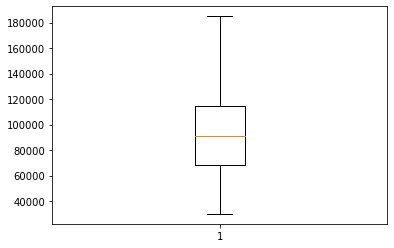

In [18]:
plt.boxplot(featCols['salaryusd'], showfliers = False)

In [19]:
featCols['salaryusd'].describe()

count               6,478.00
mean               92,860.62
std                32,889.54
min                30,000.00
25%                68,000.00
50%                91,000.00
75%               115,000.00
max               210,000.00
Name: salaryusd, dtype: float64

Now the salary column is looking pretty good, and we have some useful information. But notice that this is for the countries that participated in the survey when we're only looking for certain roles in the U.S. This means it's now prudent to explore and clean the country and years of experience columns.

In [20]:
featCols.replace(r'\\n', '', regex = True)
featCols['country'].value_counts()

United States     4439
United Kingdom     646
Canada             241
Australia          182
Germany             94
                  ... 
Colombia             1
Guatemala            1
Jordan               1
Pakistan             1
El Salvador          1
Name: country, Length: 69, dtype: int64

It's convenient here to isolate the data from the top 5 countries into their own frames which can be later used if need be. Additionally, they can be recombined into a frame consisting of only the top 5 responding countries to remove the low response countries and avoid clutter.

In [21]:
US = featCols.loc[featCols['country'] == 'United States']
UK = featCols.loc[featCols['country'] == 'United Kingdom']
CAN = featCols.loc[featCols['country'] == 'Canada']
AUS = featCols.loc[featCols['country'] == 'Australia']
GER = featCols.loc[featCols['country'] == 'Germany']

top5Countries = US.merge(UK.merge(CAN.merge(AUS.merge(GER, how = 'outer'), how = 'outer'), how = 'outer'), how = 'outer')
top5Countries

,timestamp,salaryusd,country,jobtitle,yearswiththistypeofjob,education
0,2017-01-05T05:10:20.451,"200,000.00",United States,DBA,5,Masters
1,2017-01-05T07:22:44.428,"137,500.00",United States,DBA,6,None (no degree completed)
2,2017-01-05T07:35:03.887,"85,000.00",United States,DBA,2,Bachelors (4 years)
3,2017-01-05T07:36:32.463,"96,000.00",United States,DBA,5,Masters
4,2017-01-05T07:36:55.861,"66,000.00",United States,"Developer: App code (C#, JS, etc)",10,Associates (2 years)
...,...,...,...,...,...,...
5597,2018-12-26T22:44:05.971,"80,000.00",Germany,Developer: T-SQL,5,Associates (2 years)
5598,2019-01-01T15:16:24.283,"86,000.00",Germany,"Developer: App code (C#, JS, etc)",12,None (no degree completed)
5599,2019-01-02T01:31:46.644,"63,000.00",Germany,"DBA (Development Focus - tunes queries, indexe...",5,None (no degree completed)
5600,2019-01-03T01:03:42.318,"96,700.00",Germany,DBA (General - splits time evenly between writ...,12,Masters


US:Blue
UK:Orange
CAN:Red
AUS:Green
GER:Purple


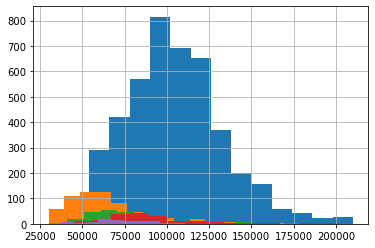

In [22]:
US.salaryusd.hist(bins = 15)
UK.salaryusd.hist(bins = 15)
CAN.salaryusd.hist(bins = 15)
AUS.salaryusd.hist(bins = 15)
GER.salaryusd.hist(bins = 15)
print('US:Blue\nUK:Orange\nCAN:Red\nAUS:Green\nGER:Purple')

Clearly the American data professionals are making more money, but a dollar in the United States may not buy the same things a dollar in say Germany and vice versa. That being said, it's unlikely that a dollar in the US buys double what it would in the UK. This implies that the US pays considerably more on average than the other top 5 responding countries in the survey. Since the quantity of data is skewed heavily towards the US any further analysis should focus on it using the US frame.

In [23]:
US.salaryusd.describe()

count               4,439.00
mean              103,639.47
std                29,062.98
min                30,000.00
25%                84,000.00
50%               102,000.00
75%               121,000.00
max               210,000.00
Name: salaryusd, dtype: float64

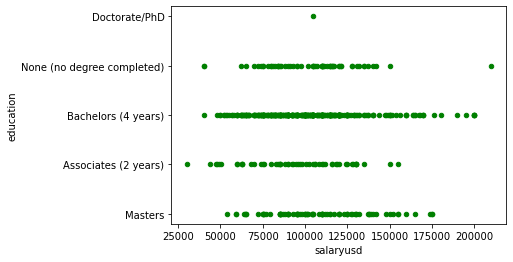

In [24]:
US.sample(500).plot(kind = 'scatter', x = 'salaryusd', y = 'education', color = 'g')

In [25]:
US.education.value_counts()

Bachelors (4 years)           2522
Masters                        744
None (no degree completed)     659
Associates (2 years)           491
Doctorate/PhD                   23
Name: education, dtype: int64

Interestingly, education does not seem to be a huge factor in the salaries reported in the survey. Perhaps years of relevant experience plays a more important role? 

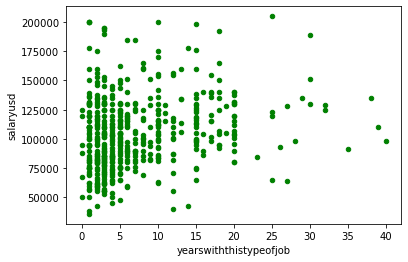

In [26]:
US.sample(500).plot(kind = 'scatter', x = 'yearswiththistypeofjob', y = 'salaryusd', color = 'g')

A decent positive correlation is apparent, but isn't strong enough to explain the data. A reasonable hypothesis is that location inside the US plays some role. For example, a data scientist in California probably makes a lot more than one in Iowa. Another area of interest here is whether different data professionals make different salaries. Perhaps data analysts,data scientists and DBA's have some contrast?

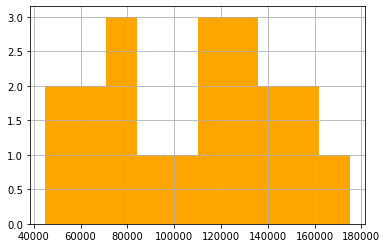

In [27]:
US.loc[featCols['jobtitle'] == 'Data Scientist'].salaryusd.hist(color = 'orange')

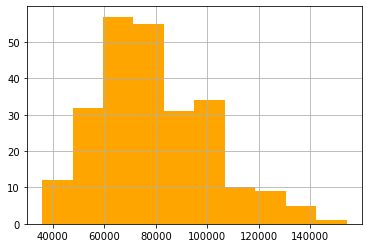

In [28]:
US.loc[featCols['jobtitle'] == 'Analyst'].salaryusd.hist(color = 'orange')

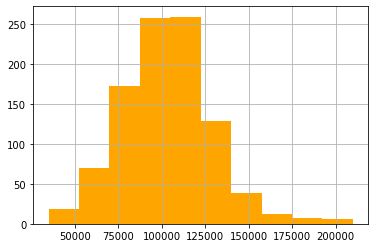

In [29]:
US.loc[featCols['jobtitle'] == 'DBA'].salaryusd.hist(color = 'orange')

In [30]:
print("Data Scientist\n",US.loc[featCols['jobtitle'] == 'Data Scientist'].salaryusd.describe(), 
      "\n\nData Analyst\n", US.loc[featCols['jobtitle'] == 'Analyst'].salaryusd.describe(),
      "\n\nDBA\n", US.loc[featCols['jobtitle'] == 'DBA'].salaryusd.describe())

Data Scientist
 count                  20.00
mean              107,799.65
std                39,538.90
min                45,000.00
25%                71,000.00
50%               116,000.00
75%               136,750.00
max               175,000.00
Name: salaryusd, dtype: float64 

Data Analyst
 count                 246.00
mean               78,970.36
std                21,665.86
min                35,800.00
25%                64,000.00
50%                75,000.00
75%                93,117.00
max               154,000.00
Name: salaryusd, dtype: float64 

DBA
 count                 970.00
mean              102,749.20
std                25,660.56
min                35,000.00
25%                86,000.00
50%               102,000.00
75%               120,000.00
max               210,000.00
Name: salaryusd, dtype: float64


Clearly data scientists and DBA's are doing better than data analysts, but data scientists have quite a lot of variation compared to analysts and DBA's. Also of note is the particularly low quantity of data scientists compared to the other two roles, meaning it's more likely that the low sample size here is not representative of data scientists in the US in general. 

The data used in this project was obtain from: data.world/finance/data-professional-salary-survey